# 베어링 RUL 예측을 위한 시계열 데이터 주피터 노트북 

## 코랩 사용시 여기로 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive

## 기본 시각화 및 라이브러리 세팅 

In [ ]:
%pip install "modin [all]"

In [ ]:
%pip install pytz 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import shutil
import zipfile
import os
import glob

import pickle # dump variables
import numpy as np # linear algebra
import modin.pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # datetime lib
import pytz

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Matplotlib styles and plot again.
%matplotlib inline
plt.rcdefaults()

sns.set(rc={'figure.figsize': tuple(plt.rcParams['figure.figsize'])})
sns.set(style="whitegrid", font_scale=1.75)

# prettify plots
plt.rcParams['figure.figsize'] = [20.0, 5.0]
plt.rcParams['figure.dpi'] = 200
sns.set_palette(sns.color_palette("muted"))

## You can also just do this in Colab/Jupyter, some "magic":
%config InlineBackend.figure_format='retina'
# See https://ipython.org/ipython-doc/3/api/generated/IPython.display.html
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


## 데이터 불러오기 (코랩 or Local)

In [2]:
%cd ../data

/home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project/data


In [ ]:
!unzip 'archive (1).zip'

In [4]:
%pip install pytz
 

Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:

  Traceback (most recent call last):
    File "/usr/lib/python3.10/site.py", line 192, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "/home/i4624/.local/lib/python3.10/site-packages/pandas/__init__.py", line 16, in <module>
      raise ImportError(
  ImportError: Unable to import required dependencies:
  pytz: No module named 'pytz'

Remainder of file ignored
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version num

In [5]:
%cd /home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project

# CSV 파일들이 있는 디렉토리 경로
directory_path = '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/'

# 디렉토리 내의 모든 CSV 파일 경로를 가져오기
file_paths = glob.glob(directory_path + '/*.csv')

# 파일 경로를 순서대로 정렬
file_paths = sorted(file_paths)

# 파일들을 담을 빈 DataFrame 생성
combined_data = pd.DataFrame()

# acc 파일만 불러오기 (파일명에 'acc'가 포함된 파일들)
acc_file_paths = [file_path for file_path in file_paths if 'acc' in file_path]



/home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project


2023-07-31 15:26:02,241	INFO worker.py:1621 -- Started a local Ray instance.


In [6]:
acc_file_paths

['../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00001.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00002.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00003.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00004.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00005.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00006.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00007.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00008.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00009.csv',
 '../Team-project/data/ieee-

In [8]:
# Read all CSV files and combine them into a single DataFrame
combined_data = pd.concat((pd.read_csv(file_path, index_col=None, header=None) for file_path in acc_file_paths), ignore_index=True)


In [ ]:
# 각 파일을 순회하며 데이터를 불러온 뒤 빈 DataFrame에 추가
for file_path in acc_file_paths:
    df = pd.read_csv(file_path, index_col=None,header = None)  # 첫 번째 행을 인덱스로 사용하지 않음
    combined_data = pd.concat([combined_data, df], ignore_index=True,axis = 0)

In [ ]:
file_paths

In [9]:
combined_data

,0,1,2,3,4,5
0,9,2,51,775040.0,-0.070,-0.354
1,9,2,51,775080.0,-0.571,-0.036
2,9,2,51,775120.0,-0.660,0.413
3,9,2,51,775160.0,-0.498,-0.043
4,9,2,51,775200.0,-0.749,-0.354
...,...,...,...,...,...,...
6266875,15,50,41,874840.0,-0.147,3.539
6266876,15,50,41,874880.0,2.178,0.809
6266877,15,50,41,874920.0,-0.268,-3.877
6266878,15,50,41,874960.0,-1.258,-0.673


In [80]:
combined_data = pd.DataFrame(combined_data)

In [100]:
# import datetime
# def make_timestamp(data):
#   """
#   Converts pandas data to timestamp.

#   Args:
#     data: A pandas DataFrame with time data in the format "hh:mm:ss.sss".

#   Returns:
#     A pandas DataFrame with the time data converted to timestamp.
#   """

#   timestamp = []
#   for time in data['time']:
#     dt = datetime.datetime.strptime(time, '%H:%M:%S.%f')
#     timestamp.append(dt.timestamp())

#   data['timestamp'] = timestamp
#   return data

In [ ]:
# timestamp = []
# for i in range(len(combined_data)):
#   time = combined_data.loc[i, ]
#   dt = datetime.datetime.strptime(time, '%H:%M:%S.%f')
#   timestamp.append(dt.timestamp())

In [ ]:
# combined_data['time'] = [
#     '01:02:03.001',
#     '04:05:06.002',
#     '07:08:09.003',
#   ]

# timestamp_data = pd.DataFrame(combined_data)

# timestamp_data = make_timestamp(combined_data)
# timestamp_data['time'] = timestamp


In [10]:
# Convert timestamp columns to integers and create a new DataFrame with these values
timestamp_integers = combined_data[[0, 1, 2, 3]].astype(int)
timestamp_integers.columns = ['hour', 'minute', 'second', 'microsecond']

# Combine the integer values to form a string in the format 'HH:MM:SS.microseconds'
combined_data['timestamp'] = timestamp_integers.apply(lambda x: f"{x['hour']:02d}:{x['minute']:02d}:{x['second']:02d}.{x['microsecond']:06d}", axis=1)

# Convert the 'timestamp' column to a Pandas datetime object
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'], format='%H:%M:%S.%f')

(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet)   Traceback (most recent call last):
(raylet)     File "/usr/lib/python3.10/site.py", line 192, in addpackage
(raylet)       exec(line)
(raylet)     File "<string>", line 1, in <module>
(raylet)     File "/home/i4624/.local/lib/python3.10/site-packages/pandas/__init__.py", line 16, in <module>
(raylet)       raise ImportError(
(raylet)   ImportError: Unable to import required dependencies:
(raylet)   pytz: No module named 'pytz'
(raylet) 
(raylet) Remainder of file ignored


In [81]:
## 낡은 방식의 데이터 처리방식
def convert_to_datetime(row):
    hour = int(row[0])
    minute = int(row[1])
    second = int(row[2])
    microsecond = int(row[3])

    timestamp = f"{hour:02d}:{minute:02d}:{second:02d}.{microsecond:06d}"
    return pd.to_datetime(timestamp, format='%H:%M:%S.%f')

combined_data['timestamp'] = combined_data.apply(convert_to_datetime, axis=1)


In [12]:
combined_data['timestamp'] = combined_data['timestamp'].dt.time

In [13]:
combined_data

,0,1,2,3,4,5,timestamp
0,9,2,51,775040.0,-0.070,-0.354,09:02:51.775040
1,9,2,51,775080.0,-0.571,-0.036,09:02:51.775080
2,9,2,51,775120.0,-0.660,0.413,09:02:51.775120
3,9,2,51,775160.0,-0.498,-0.043,09:02:51.775160
4,9,2,51,775200.0,-0.749,-0.354,09:02:51.775200
...,...,...,...,...,...,...,...
6266875,15,50,41,874840.0,-0.147,3.539,15:50:41.874840
6266876,15,50,41,874880.0,2.178,0.809,15:50:41.874880
6266877,15,50,41,874920.0,-0.268,-3.877,15:50:41.874920
6266878,15,50,41,874960.0,-1.258,-0.673,15:50:41.874960


In [ ]:
# Step 3: Downsample the data to reduce the number of points
downsampled_data = combined_data.set_index('timestamp').resample('100ms').mean()


In [ ]:
# Step 3: Downsample the data by selecting every nth data point
n = len(combined_data) // 1000  # Adjust this value as needed for desired downsampling ratio
downsampled_data = combined_data.iloc[::n]

In [110]:
print(downsampled_data)

          0   1   2         3      4      5                  timestamp
0         9  39  39   65664.0  0.552 -0.146 1900-01-01 09:39:39.065664
7175      9  39  59  145940.0 -0.714  0.615 1900-01-01 09:39:59.145940
14350     9  40  29  126210.0  1.062  0.234 1900-01-01 09:40:29.126210
21525     9  40  59  106480.0 -0.495  0.043 1900-01-01 09:40:59.106480
28700     9  41  29   86757.0  0.754 -1.104 1900-01-01 09:41:29.086757
...      ..  ..  ..       ...    ...    ...                        ...
7146300  17  24  49  118010.0  0.104  2.651 1900-01-01 17:24:49.118010
7153475  17  25  19   98281.0 -2.927  0.043 1900-01-01 17:25:19.098281
7160650  17  25  49   78554.0 -0.631  0.006 1900-01-01 17:25:49.078554
7167825  17  26   9  158830.0  1.060  0.269 1900-01-01 17:26:09.158830
7175000  17  26  39  139100.0 -5.187  8.972 1900-01-01 17:26:39.139100

[1001 rows x 7 columns]


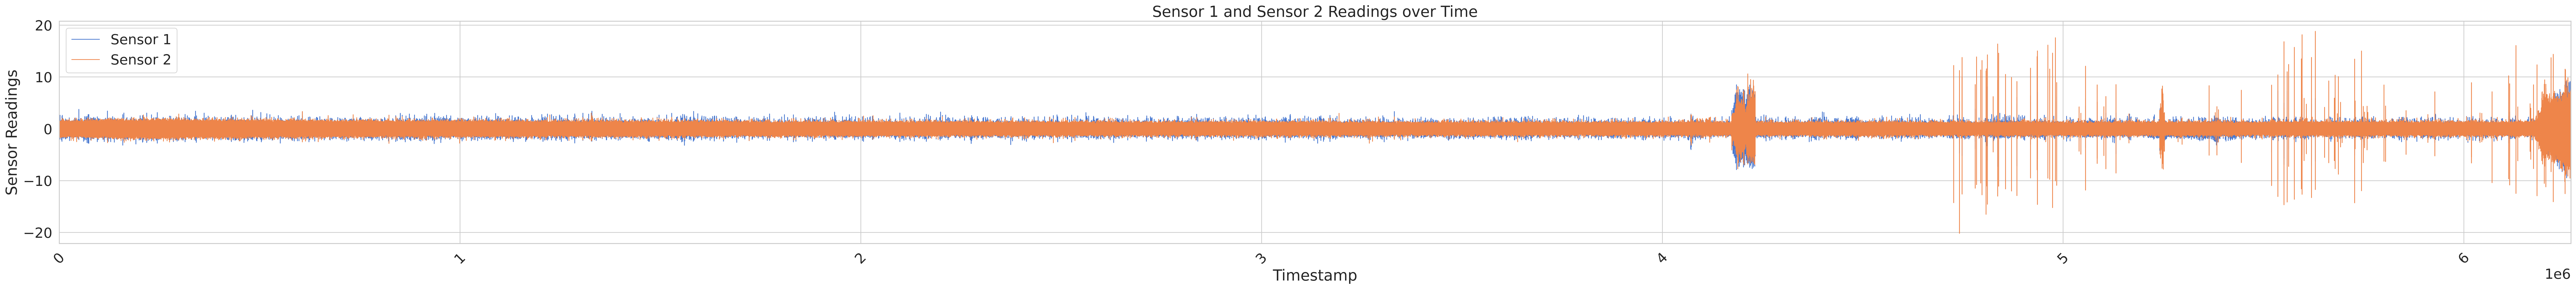

In [14]:
# Step 4: Plot the graph
plt.figure(figsize=(50, 6))

# Plot line graphs with narrower lines
plt.plot(combined_data.index, combined_data[4], label='Sensor 1', linewidth=1)
plt.plot(combined_data.index, combined_data[5], label='Sensor 2', linewidth=1)

plt.xlabel('Timestamp')
plt.ylabel('Sensor Readings')
plt.title('Sensor 1 and Sensor 2 Readings over Time')
plt.legend()
plt.xticks(rotation=45)
plt.xlim(combined_data.index.min(), combined_data.index.max())  # Set x-axis limits to show the full time range
plt.tight_layout()
plt.show()

In [ ]:
# Step 4: Plot the graph
plt.figure(figsize=(10, 6))

# Plot line graphs with narrower lines
plt.plot(downsampled_data.index, downsampled_data[4], label='Sensor 1', linewidth=1)
plt.plot(downsampled_data.index, downsampled_data[5], label='Sensor 2', linewidth=1)

plt.xlabel('Timestamp')
plt.ylabel('Sensor Readings')
plt.title('Sensor 1 and Sensor 2 Readings over Time')
plt.legend()
plt.xticks(rotation=45)
plt.xlim(downsampled_data.index.min(), downsampled_data.index.max())  # Set x-axis limits to show the full time range
plt.tight_layout()
plt.show()

In [18]:
combined_data

,4,5,timestamp
0,0.552,-0.146,09:39:39.065664
1,0.501,-0.480,09:39:39.065703
2,0.138,0.435,09:39:39.065742
3,-0.423,0.240,09:39:39.065781
4,-0.802,0.020,09:39:39.065820
...,...,...,...
7175675,-3.353,2.129,17:26:39.165470
7175676,-2.868,-2.299,17:26:39.165510
7175677,-5.507,-1.844,17:26:39.165550
7175678,-3.578,2.146,17:26:39.165580


In [15]:
# Remove columns 0, 1, 2, and 3 from the DataFrame
combined_data.drop(columns=[0, 1, 2, 3], inplace=True)


In [16]:
combined_data.rename(columns={4:'horiz',5:'vert'})

,horiz,vert,timestamp
0,-0.070,-0.354,09:02:51.775040
1,-0.571,-0.036,09:02:51.775080
2,-0.660,0.413,09:02:51.775120
3,-0.498,-0.043,09:02:51.775160
4,-0.749,-0.354,09:02:51.775200
...,...,...,...
6266875,-0.147,3.539,15:50:41.874840
6266876,2.178,0.809,15:50:41.874880
6266877,-0.268,-3.877,15:50:41.874920
6266878,-1.258,-0.673,15:50:41.874960


In [17]:
# Determine the chunk size for saving to JSON (e.g., 10,000 rows per chunk)
chunk_size = 2560

# Calculate the number of chunks required
num_chunks = len(combined_data) // chunk_size + 1

# Specify the directory path for the JSON files
output_directory = "../Team-project/data/result/out/json/07-31-3"  # Replace with the desired directory path

# Save the DataFrame to JSON in smaller chunks
for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size
    chunk_data = combined_data.iloc[start_idx:end_idx]
    
    # Save each chunk to a separate JSON file in the specified directory
    json_data = chunk_data.to_json(orient='records', lines=True)
    file_name = os.path.join(output_directory, f'data_chunk_{i}.json')
    with open(file_name, 'w') as json_file:
        json_file.write(json_data)